In [1]:
import os
import cv2 as cv #opencv for improved image recognition and better performance
import numpy as np #numpy for Math
import matplotlib.pyplot as plt #matplotlib for visualization of the images 

from tensorflow import keras 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import cifar10 #tensorflow for neural network stuff

In [3]:
(training_images, training_labels), (testing_images, testing_labels) = cifar10.load_data()

#normalize/prepare image data 
training_images = training_images / 255 #scale down data
testing_images = testing_images / 255

#defining classes
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# for i in range(16):
#     plt.subplot(4, 4, i+1) #4x4 Grid, i+1 fills the next cell with the next image
#     plt.xticks([]) #removes coordinate system for better visualization
#     plt.yticks([])
#     plt.imshow(training_images[i]) #shows images, plt.cm = color map
#     plt.xlabel(class_names[training_labels[i][0]]) #xlabels: below img show class name corresponding to the image (starting at index 0)
#                                                     #in other words: get label of the image and pass label-index as index for our class list
#                                                     #Bsp: if image_label is 3, we get 'Cat' in class_names list
# plt.show()


#reduces training data & testing data to the first 20000 bzw. 4000 images
#reduces time

training_images = training_images[:20000] 
training_labels = training_labels[:20000] 

testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"loss: {loss}")
print(f"Accuracy: {accuracy}")

#save Model in directory, so u don't have to train it every time
#model.save('savedModel.keras')

img = cv.imread('horse.jpg')
img = cv.resize(img, (32, 32))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

c:\Users\felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.2695 - loss: 1.9512 - val_accuracy: 0.4207 - val_loss: 1.5445
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4643 - loss: 1.4706 - val_accuracy: 0.5048 - val_loss: 1.3675
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5234 - loss: 1.3161 - val_accuracy: 0.5502 - val_loss: 1.2615
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5728 - loss: 1.1911 - val_accuracy: 0.5515 - val_loss: 1.2257
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6072 - loss: 1.1087 - val_accuracy: 0.5870 - val_loss: 1.1594
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6332 - loss: 1.0390 - val_accuracy: 0.6053 - val_loss: 1.1503
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6607 - loss: 0.9665 - val_accuracy: 0.6000 - val_loss: 1.1431
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6826 - loss: 0.9047 - val_a

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction is Dog


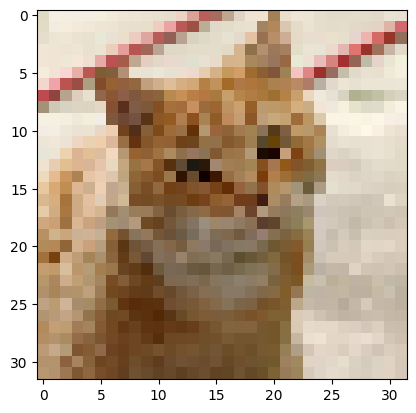

In [9]:
img = cv.imread('C:/Users/felix/Downloads/cat.jpg')
img = cv.resize(img, (32, 32))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

In [2]:
print(training_images)

NameError: name 'training_images' is not defined